# Tugas Besar IF2220 Probabilitas dan Statistika - Penarikan Kesimpulan dan Pengujian Hipotesis

Tujuan pengerjaan tugas ini adalah untuk melakukan analisis statistik terhadap data anggur.csv dan melakukan pengujian hipotesis terhadap data tersebut.

Tugas ini dikerjakan oleh
| Nama                      | NIM      |
| :----------------------- | :------- |
| Nicholas Liem             | 13521135 |
| Nathania Calista Djunaedi | 13521139 |

In [5]:
# Gambaran anggur.csv
data_anggur <- read.csv("../data/anggur.csv")
head(data_anggur)


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5.90,0.4451,0.1813,2.049401,0.07057449,16.593818,42.27,0.9982,3.27,0.71,8.64,7
2,8.40,0.5768,0.2099,3.109590,0.10168145,22.555519,16.01,0.9960,3.35,0.57,10.03,8
3,7.54,0.5918,0.3248,3.673744,0.07241553,9.316866,35.52,0.9990,3.31,0.64,9.23,8
4,5.39,0.4201,0.3131,3.371815,0.07275452,18.212300,41.97,0.9945,3.34,0.55,14.07,9
5,6.51,0.5675,0.1940,4.404723,0.06637859,9.360591,46.27,0.9925,3.27,0.45,11.49,8
6,9.18,0.3332,0.2476,2.633491,0.08230416,12.232170,51.05,0.9965,3.40,0.63,10.82,8


## Soal No.1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis.

In [17]:
# Soal No.1

desc_stats <- sapply(data_anggur[,1:11], function(x) c(
  mean = mean(x),
  median = median(x),
  mode = as.numeric(names(sort(-table(x)))[1]), # Mengambil modus terbanyak
  sd = sd(x),
  var = var(x),
  min = min(x),
  max = max(x),
  range = max(x) - min(x),
  q1 = quantile(x, 0.25),
  q3 = quantile(x, 0.75),
  iqr = IQR(x),
  skewness = sum((x - mean(x))^3) / (length(x) * sd(x)^3), # Menghitung skewness
  kurtosis = sum((x - mean(x))^4) / (length(x) * sd(x)^4) - 3 # Menghitung kurtosis
))

# Menampilkan deskripsi statistika
print(desc_stats)

         fixed.acidity volatile.acidity citric.acid residual.sugar
mean        7.15253000      0.520838500  0.27051700     2.56710368
median      7.15000000      0.524850000  0.27220000     2.51943027
mode        6.54000000      0.554600000  0.30190000     0.03255453
sd          1.20159758      0.095848274  0.04909837     0.98791544
var         1.44383674      0.009186892  0.00241065     0.97597691
min         3.32000000      0.139900000  0.11670000     0.03255453
max        11.49000000      0.805100000  0.40960000     5.55075493
range       8.17000000      0.665200000  0.29290000     5.51820041
q1.25%      6.37750000      0.456100000  0.23780000     1.89632994
q3.75%      8.00000000      0.585375000  0.30232500     3.22087348
iqr         1.62250000      0.129275000  0.06452500     1.32454354
skewness   -0.02879200     -0.197105998 -0.04543942     0.13224044
kurtosis   -0.03113645      0.148743819 -0.11592740    -0.05465897
             chlorides free.sulfur.dioxide total.sulfur.dioxid

## Soal No.2
Membuat visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

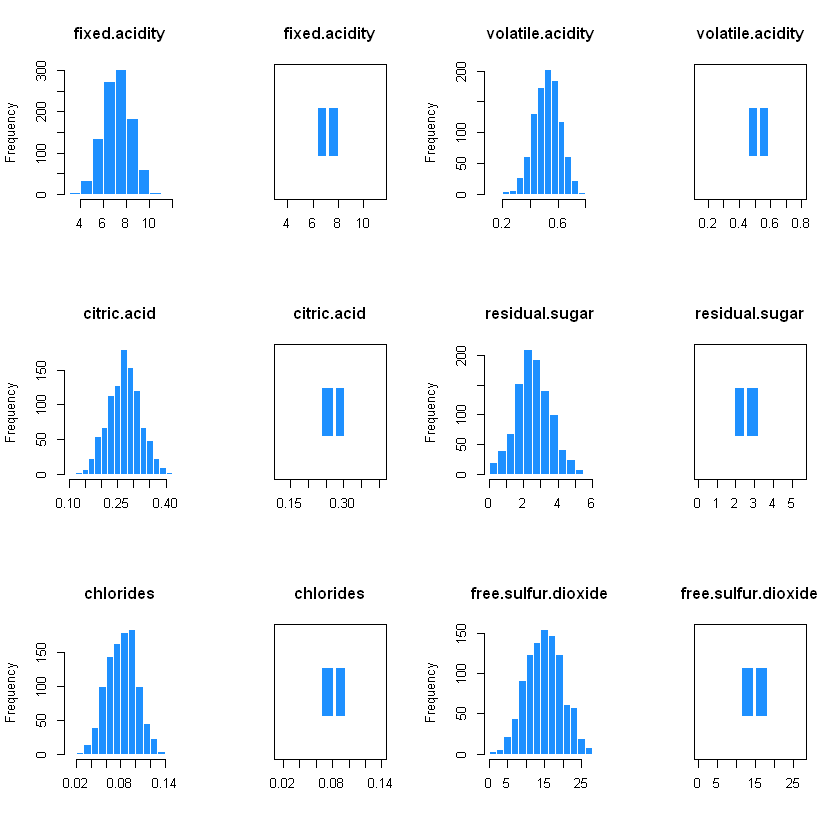

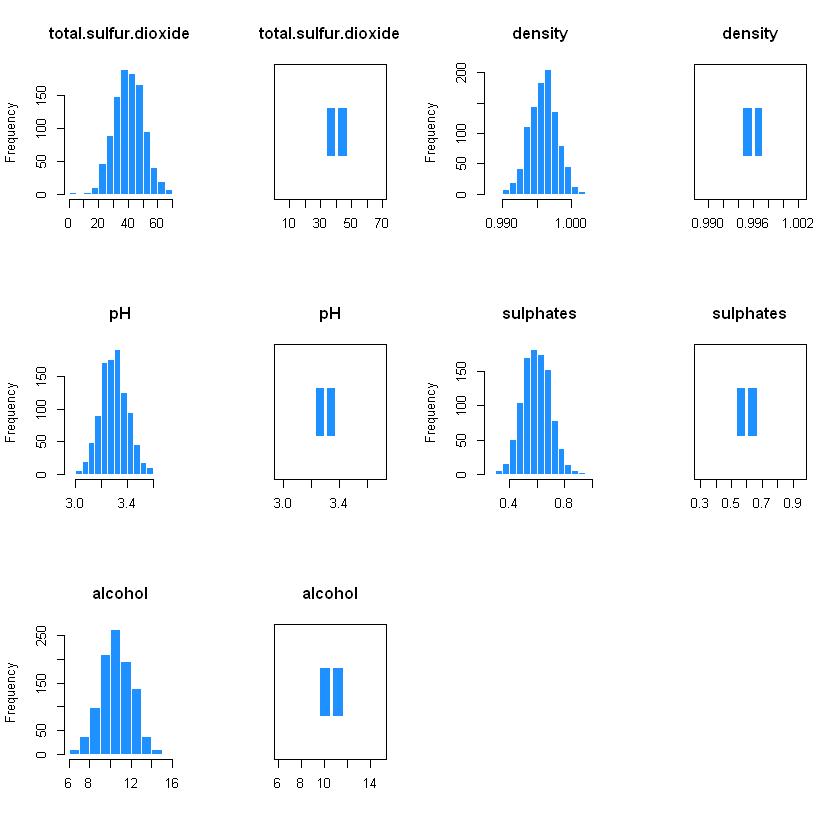

In [23]:
# Soal No.2

# Membuat visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik.
par(mfrow=c(3, 4))
for (i in 1:11) {
  hist(data_anggur[,i], main = colnames(data_anggur)[i], xlab = "", col = "dodgerblue", border = "white")
  boxplot(data_anggur[,i], main = colnames(data_anggur)[i], col = "dodgerblue", border = "white", horizontal = TRUE)
}

### Penjelasan No.2
<!--  ToDo  -->
1. Fixed Acidity
    * Histogram
    * Boxplot

## Soal No.3
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

In [ ]:
# Syarat distribusi normal adalah mean = modus = median 

## Data Untuk Nomor 4

In [33]:
ph <- data_anggur[,9]
xPH <- mean(ph)
n <- nrow(data_anggur)
sdPH <- sd(ph)


## Soal No.4
Melakukan test hipotesis 1 sampel,
   1. Nilai rata-rata pH di atas 3.29?
   2. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?
   3. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?
   4. Nilai rata-rata total sulfur dioxide di bawah 35?
   5. Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?

In [36]:
#Bagian 1

# H0 : rata2 = 3.29
# H1 = rata2 > 3.29 
# tingkat signifikan = 0.05 
final <- 0
significant <- 0.05
# Daerah kritis (Z > Z0.05 = 1.645) karena P(Z < 1.645) = 0.95
# Cari nilai x 

critical_value <- 1.645
# Jumlah data

u <- 3.29

z <- (xPH - 3.29)*sqrt(n)/sdPH
if(z < critical_value ){
    final <-1
}

#Hitung P value dengan menggunakan tabel 
p <- 0

if(p >= significant){
    final <-1
}

if(final == 1){
    print("Rata - rata sama dengan 3.29")
}else{
    print("Hipotesis ditolak karena rata - rata di atas 3.29")
}

[1] "Hipotesis ditolak karena rata - rata di atas 3.29"


In [41]:
#Bagian 2

#1. H0 : rata2 = 2.50
#2. H1 = rata2 != 2.50 
#3. tingkat signifikan = 0.05 
final <- 0
significant <- 0.05
# 4. Daerah kritis (Z > Z0.025 = 1.96) karena P(Z < 1.96) = 0.975
#    Daerah kritisnya (-1.96 < Z < 1.96) 

residual_sugar = data_anggur[,4]
residual_sugar_mean <- mean(residual_sugar)
residual_sugar_sd <- sd(residual_sugar)
#miu = 2.50 karena ketentuan soal 
u <- 2.50

# 5. Hitung nilai uji statistik dari data sample dan P value nya 

#Nilai uji statistik
z <- (residual_sugar_mean - 2.50)*sqrt(n)/residual_sugar_sd
#P value dihitung dengan melihat tabel area di bawah distribusi normal 2 * P(Z > 2.15) atau 2*P(Z < -2.15) karena
# P(Z < -2.15) = 0.016 
# P value = 0.032
p <- 0.032
if(p < significant){
    print("Hipotesis H0 ditolak")
}


print(z)


[1] 2.147962


In [ ]:
#Bagian 2


## Soal No.5
Melakukan test hipotesis 2 sampel,
   1. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
   2. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
   3. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?
   4. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
   5. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?
